In [1]:
import matplotlib.pyplot as plt
import numpy as np
import finesse
from math import factorial
import pandas as pd
from scipy import integrate
from scipy.signal import find_peaks
from uncertainties import unumpy, ufloat

finesse.configure(plotting=True)

In [2]:
def drop_return(df, index):
    row = df.loc[index]
    df.drop(index, inplace=True)
    return row

In [3]:
def mean_std(areas):
    areas_mean = np.mean(areas)
    areas_std = np.std(areas)/np.sqrt(5)
    
    areas = ufloat(areas_mean, areas_std)
    print(f"Areas: {areas}")
    print(f"Area Mean: {areas.nominal_value}")
    print(f"Area STD: {areas.std_dev}")

    return areas

In [4]:
path1 = './0913/3/HG44.csv'
path2 = './0913/3/HG44_2nd_1.csv'
path3 = './0913/3/HG44_2nd_2.csv'
path4 = './0913/3/HG44_2nd_3.csv'
path5 = './0913/3/HG44_2nd_4.csv'
path6 = './0913/3/HG44_2nd_5.csv'
path7 = './0913/3/HG44_2nd_6.csv'
path8 = './0913/3/HG44_2nd_7.csv'
path9 = './0913/3/HG44_2nd_8.csv'

df1 = pd.read_csv(path1, skiprows=10)
df2 = pd.read_csv(path2, skiprows=10)
df3 = pd.read_csv(path3, skiprows=10)
df4 = pd.read_csv(path4, skiprows=10)
df5 = pd.read_csv(path5, skiprows=10)
df6 = pd.read_csv(path6, skiprows=10)
df7 = pd.read_csv(path7, skiprows=10)
df8 = pd.read_csv(path8, skiprows=10)
df9 = pd.read_csv(path9, skiprows=10)

units = drop_return(df1, index=0)
units = drop_return(df2, index=0)
units = drop_return(df3, index=0)
units = drop_return(df4, index=0)
units = drop_return(df5, index=0)
units = drop_return(df6, index=0)
units = drop_return(df7, index=0)
units = drop_return(df8, index=0)
units = drop_return(df9, index=0)

print(units.values)

df1 = df1.apply(lambda col:pd.to_numeric(col, errors='coerce'))
df2 = df2.apply(lambda col:pd.to_numeric(col, errors='coerce'))
df3 = df3.apply(lambda col:pd.to_numeric(col, errors='coerce'))
df4 = df4.apply(lambda col:pd.to_numeric(col, errors='coerce'))
df5 = df5.apply(lambda col:pd.to_numeric(col, errors='coerce'))
df6 = df6.apply(lambda col:pd.to_numeric(col, errors='coerce'))
df7 = df7.apply(lambda col:pd.to_numeric(col, errors='coerce'))
df8 = df8.apply(lambda col:pd.to_numeric(col, errors='coerce'))
df9 = df9.apply(lambda col:pd.to_numeric(col, errors='coerce'))


xdata = df1["Source"].values
freq = df1["CH1"].values
pd1 = df1["CH2"].values
pd2_1_44 = df1["CH3"].values
pd2_2_44 = df2["CH3"].values
pd2_3_44 = df3["CH3"].values
pd2_4_44 = df4["CH3"].values
pd2_5_44 = df5["CH3"].values
pd2_6_44 = df6["CH3"].values
pd2_7_44 = df7["CH3"].values
pd2_8_44 = df8["CH3"].values
pd2_9_44 = df9["CH3"].values

['Second' 'Volt' 'Volt' 'Volt']


In [47]:
colors = plt.cm.get_cmap("Spectral", 5)

fig, ax = plt.subplots(figsize=(7, 5))

ax.plot(xdata, freq, "r", label="Laser Frequency")
ax.plot(xdata, pd1, "b", label="PD1")
ax.plot(xdata, pd2_1_44, color=colors(0), label="PD2 HG44")
ax.plot(xdata, pd2_2_44, color=colors(1), label="PD2 HG44 2nd 1")
ax.plot(xdata, pd2_3_44, color=colors(2), label="PD2 HG44 2nd 2")
ax.plot(xdata, pd2_4_44, color=colors(3), label="PD2 HG44 2nd 3")
ax.plot(xdata, pd2_5_44, color=colors(4), label="PD2 HG44 2nd 4")

ax.set_xlabel("Time (Seconds)", fontsize=14)
ax.set_ylabel("Signal (V)", fontsize=16)
plt.legend(loc=(0.05, 0.5), ncol=2, fontsize=14);

In [6]:
def HG44Area(ydata, pdoffset=6.9e-3):
    fig, ax = plt.subplots(figsize=(7, 5))

    ax.plot(xdata, ydata, 'b')

    # offset = np.sort(ydata)[:base_threshold].mean()
    offset = pdoffset
    ax.hlines(y=offset, xmin=xdata.min(), xmax=xdata.max(), color='r', lw=2)

    ydata = ydata - offset
    integration = integrate.cumtrapz(ydata, xdata, initial=0)
    ax1 = ax.twinx()
    ax1.plot(xdata, integration, lw=2, color="orange")

    length = ydata.shape[0]
    plateau_idx = [0.08464, 0.264, 0.44335714, 0.61942857, 0.8015]
    # for x0 in plateau_idx:
    #     ax1.plot(xdata[int(x0*length)], integration[int(x0*length)], 'y.', markersize=20)

    # x1, x2 = plateau_idx
    # num_steps = 4
    # stepsize = (integration[int(x2*length)] - integration[int(x1*length)])/num_steps
    # print(f"The step size/area under the peak is: {stepsize:.6f}")
    Areas = []
    for idx, x in enumerate(plateau_idx):
        x1 = x
        ax1.plot(xdata[int(x1*length)], integration[int(x1*length)], 'y.', markersize=20)
        if idx < len(plateau_idx) - 1:
            x2 = plateau_idx[idx+1]
            Area = integration[int(x2*length)] - integration[int(x1*length)]
            print(f"The area under the peak is: {Area:.6f}")
            Areas.append(Area)


    ax.set_xlabel("Time Step", fontsize=14)
    ax.set_ylabel("PD Signal (mV)", fontsize=16)
    ax1.set_ylabel("Area Under the Signal", fontsize=16)
    ax.tick_params(axis='y', labelcolor="blue")
    ax1.tick_params(axis='y', labelcolor="orange")
    ax1.spines['left'].set_color('blue') 
    ax1.spines['right'].set_color('orange')
    
    return np.array(Areas)

In [7]:
peaks, _ = find_peaks(pd2_1_44, height=0.284)
peaks/pd2_1_44.shape[0]

array([0.171     , 0.17157143, 0.17185714, 0.35642857, 0.53      ,
       0.53028571, 0.53071429, 0.531     , 0.53128571, 0.70857143,
       0.70885714, 0.894     , 0.89442857, 0.89471429])

In [8]:
(0.35642857+0.17157143)/2, (0.35642857+0.53028571)/2, (0.70857143+0.53028571)/2, (0.70857143+0.89442857)/2

(0.264, 0.44335714000000004, 0.61942857, 0.8015)

In [9]:
0.264*2-0.44335714

0.08464286000000004

In [48]:
# area_1_44s = HG44Area(pd2_1_44, 9e-3)

# area_1_44 = mean_std(area_1_44s)

In [46]:
# area_2_44s = HG44Area(pd2_2_44, 7e-3)
# area_2_44 = mean_std(area_2_44s)

In [45]:
# area_3_44s = HG44Area(pd2_3_44, 7.e-3)
# area_3_44 = mean_std(area_3_44s)

In [44]:
# area_4_44s = HG44Area(pd2_4_44, 7.e-3)
# area_4_44 = mean_std(area_4_44s)

In [43]:
# area_5_44s = HG44Area(pd2_5_44, 7e-3)
# area_5_44 = mean_std(area_5_44s)

In [42]:
# area_6_44s = HG44Area(pd2_6_44, 7.2e-3)
# area_6_44 = mean_std(area_6_44s)

In [41]:
# area_7_44s = HG44Area(pd2_7_44, 6.9e-3)
# area_7_44 = mean_std(area_7_44s)

In [40]:
# area_8_44s = HG44Area(pd2_8_44, 7.8e-3)
# area_8_44 = mean_std(area_8_44s)

In [39]:
# area_9_44s = HG44Area(pd2_9_44, 6.9e-3)
# area_9_44 = mean_std(area_9_44s)

In [141]:
HG44MM = (area_2_44 + area_3_44 + area_4_44 + area_5_44 + area_6_44+area_7_44+area_8_44+area_9_44) \
/(area_1_44 + area_2_44 + area_3_44 + area_4_44 + area_5_44 + area_6_44+area_7_44+area_8_44+area_9_44)
HG44MM

0.47873284593953397+/-0.005910780313808366

In [142]:
HG44MM

0.47873284593953397+/-0.005910780313808366

In [21]:
path1 = './0913/3/HG00.csv'
path2 = './0913/3/HG00_2nd.csv'

df1 = pd.read_csv(path1, skiprows=10)
df2 = pd.read_csv(path2, skiprows=10)
units = drop_return(df1, index=0)
units = drop_return(df2, index=0)
print(units.values)

df1 = df1.apply(lambda col:pd.to_numeric(col, errors='coerce'))
df2 = df2.apply(lambda col:pd.to_numeric(col, errors='coerce'))

xdata = df1["Source"].values
freq = df1["CH1"].values
pd1 = df1["CH2"].values
pd2_1_00 = df1["CH3"].values
pd2_2_00 = df2["CH3"].values

['Second' 'Volt' 'Volt' 'Volt']


In [49]:
# colors = plt.cm.get_cmap("Spectral", 2)

# fig, ax = plt.subplots(figsize=(7, 5))

# ax.plot(xdata, freq, "r", label="Laser Frequency")
# ax.plot(xdata, pd1, "b", label="PD1")
# ax.plot(xdata, pd2_1_00, color=colors(0), label="PD2 HG00")
# ax.plot(xdata, pd2_2_00, color=colors(1), label="PD2 HG00 2nd")
# ax.set_xlabel("Time (Seconds)", fontsize=14)
# ax.set_ylabel("Signal (V)", fontsize=16)
# plt.legend(loc=(0.05, 0.5), ncol=2, fontsize=14);

In [110]:
def HG00Area(ydata, pdoffset=6.9e-3):
    fig, ax = plt.subplots(figsize=(7, 5))

    ax.plot(xdata, ydata, 'b')

    # offset = np.sort(ydata)[:base_threshold].mean()
    offset = pdoffset
    ax.hlines(y=offset, xmin=xdata.min(), xmax=xdata.max(), color='r', lw=2)

    ydata = ydata - offset
    integration = integrate.cumtrapz(ydata, xdata, initial=0)
    ax1 = ax.twinx()
    ax1.plot(xdata, integration, lw=2, color="orange")

    length = ydata.shape[0]
    plateau_idx = [0.06471, 0.242214285, 0.41978571, 0.59728571, 0.77885714]
    # for x0 in plateau_idx:
    #     ax1.plot(xdata[int(x0*length)], integration[int(x0*length)], 'y.', markersize=20)

    # x1, x2 = plateau_idx
    # num_steps = 4
    # stepsize = (integration[int(x2*length)] - integration[int(x1*length)])/num_steps
    # print(f"The step size/area under the peak is: {stepsize:.6f}")
    Areas = []
    for idx, x in enumerate(plateau_idx):
        x1 = x
        ax1.plot(xdata[int(x1*length)], integration[int(x1*length)], 'y.', markersize=20)
        if idx < len(plateau_idx) - 1:
            x2 = plateau_idx[idx+1]
            Area = integration[int(x2*length)] - integration[int(x1*length)]
            print(f"The area under the peak is: {Area:.6f}")
            Areas.append(Area)


    ax.set_xlabel("Time Step", fontsize=14)
    ax.set_ylabel("PD Signal (mV)", fontsize=16)
    ax1.set_ylabel("Area Under the Signal", fontsize=16)
    ax.tick_params(axis='y', labelcolor="blue")
    ax1.tick_params(axis='y', labelcolor="orange")
    ax1.spines['left'].set_color('blue') 
    ax1.spines['right'].set_color('orange')
    
    return np.array(Areas)

In [111]:
peaks, _ = find_peaks(pd2_1_00, height=1.1)
peaks/pd2_1_00.shape[0]

array([0.148     , 0.14871429, 0.14914286, 0.33528571, 0.50428571,
       0.50514286, 0.50542857, 0.506     , 0.69028571, 0.69071429,
       0.692     , 0.867     , 0.86742857])

In [112]:
(0.33528571+0.14914286)/2, (0.33528571+0.50428571)/2, (0.69028571+0.50428571)/2, (0.69028571+0.86742857)/2

(0.242214285, 0.41978571, 0.59728571, 0.77885714)

In [113]:
0.242214285-0.1775

0.06471428500000001

In [50]:
# area_1_00s = HG00Area(pd2_1_00, 17e-3)

# area_1_00 = mean_std(area_1_00s)

In [38]:
# area_2_00s = HG00Area(pd2_2_00, 7.3e-3)

# area_2_00 = mean_std(area_2_00s)

In [244]:
HG00MM = area_2_00/(area_1_00 + area_2_00)
print(HG00MM)
print()
print(HG00MM.nominal_value)
print(HG00MM.std_dev)
print(HG00MM.std_dev/HG00MM.nominal_value)

0.0300+/-0.0006

0.03001122271886973
0.0006285935590159794
0.02094528319969941


In [143]:
path1 = './0913/3/HG11.csv'
path2 = './0913/3/HG11_2nd_1.csv'
path3 = './0913/3/HG11_2nd_2.csv'
path4 = './0913/3/HG11_2nd_3.csv'
path5 = './0913/3/HG11_2nd_4.csv'

df1 = pd.read_csv(path1, skiprows=10)
df2 = pd.read_csv(path2, skiprows=10)
df3 = pd.read_csv(path3, skiprows=10)
df4 = pd.read_csv(path4, skiprows=10)
df5 = pd.read_csv(path5, skiprows=10)

units = drop_return(df1, index=0)
units = drop_return(df2, index=0)
units = drop_return(df3, index=0)
units = drop_return(df4, index=0)
units = drop_return(df5, index=0)

print(units.values)

df1 = df1.apply(lambda col:pd.to_numeric(col, errors='coerce'))
df2 = df2.apply(lambda col:pd.to_numeric(col, errors='coerce'))
df3 = df3.apply(lambda col:pd.to_numeric(col, errors='coerce'))
df4 = df4.apply(lambda col:pd.to_numeric(col, errors='coerce'))
df5 = df5.apply(lambda col:pd.to_numeric(col, errors='coerce'))

xdata = df1["Source"].values
freq = df1["CH1"].values
pd1 = df1["CH2"].values
pd2_1_11 = df1["CH3"].values
pd2_2_11 = df2["CH3"].values
pd2_3_11 = df3["CH3"].values
pd2_4_11 = df4["CH3"].values
pd2_5_11 = df5["CH3"].values

['Second' 'Volt' 'Volt' 'Volt']


In [51]:
colors = plt.cm.get_cmap("Spectral", 3)

fig, ax = plt.subplots(figsize=(7, 5))

ax.plot(xdata, freq, "r", label="Laser Frequency")
ax.plot(xdata, pd1, "b", label="PD1")
ax.plot(xdata, pd2_1_11, color=colors(0), label="PD2 HG11")
ax.plot(xdata, pd2_2_11, color=colors(1), label="PD2 HG11 2nd 1")
ax.plot(xdata, pd2_3_11, color=colors(2), label="PD2 HG11 2nd 2")
ax.set_xlabel("Time (Seconds)", fontsize=14)
ax.set_ylabel("Signal (V)", fontsize=16)
plt.legend(loc=(0.05, 0.5), ncol=2, fontsize=14);

In [145]:
def HG11Area(ydata, pdoffset=6.9e-3):
    fig, ax = plt.subplots(figsize=(7, 5))

    ax.plot(xdata, ydata, 'b')

    # offset = np.sort(ydata)[:base_threshold].mean()
    offset = pdoffset
    ax.hlines(y=offset, xmin=xdata.min(), xmax=xdata.max(), color='r', lw=2)

    ydata = ydata - offset
    integration = integrate.cumtrapz(ydata, xdata, initial=0)
    ax1 = ax.twinx()
    ax1.plot(xdata, integration, lw=2, color="orange")

    length = ydata.shape[0]
    plateau_idx = [0.08192, 0.261, 0.4400714, 0.61864286, 0.800928575]
    
    Areas = []
    for idx, x in enumerate(plateau_idx):
        x1 = x
        ax1.plot(xdata[int(x1*length)], integration[int(x1*length)], 'y.', markersize=20)
        if idx < len(plateau_idx) - 1:
            x2 = plateau_idx[idx+1]
            Area = integration[int(x2*length)] - integration[int(x1*length)]
            print(f"The area under the peak is: {Area:.6f}")
            Areas.append(Area)


    ax.set_xlabel("Time Step", fontsize=14)
    ax.set_ylabel("PD Signal (mV)", fontsize=16)
    ax1.set_ylabel("Area Under the Signal", fontsize=16)
    ax.tick_params(axis='y', labelcolor="blue")
    ax1.tick_params(axis='y', labelcolor="orange")
    ax1.spines['left'].set_color('blue') 
    ax1.spines['right'].set_color('orange')
    
    return np.array(Areas)

In [146]:
peaks, _ = find_peaks(pd2_1_11, height=1.)
peaks/pd2_1_00.shape[0]

array([0.182     , 0.34      , 0.34071429, 0.34171429, 0.54014286,
       0.54142857, 0.54171429, 0.69714286, 0.90442857, 0.90471429,
       0.90542857])

In [147]:
(0.182+0.34 )/2, (0.54014286+0.34 )/2, (0.54014286+0.69714286)/2, (0.90471429+0.69714286)/2, 

(0.261, 0.44007143000000004, 0.61864286, 0.800928575)

In [148]:
2*0.261-0.44007143

0.08192857000000003

In [52]:
# area_1_11s = HG11Area(pd2_1_11, 16e-3)
# area_1_11 = mean_std(area_1_11s)

In [37]:
# area_2_11s = HG11Area(pd2_2_11, 7.e-3)
# area_2_11 = mean_std(area_2_11s)

In [36]:
# area_3_11s = HG11Area(pd2_3_11, 7.15e-3)
# area_3_11 = mean_std(area_3_11s)

In [35]:
# area_4_11s = HG11Area(pd2_4_11, 7.2e-3)
# area_4_11 = mean_std(area_4_11s)

In [34]:
# area_5_11s = HG11Area(pd2_5_11, 6.9e-3)
# area_5_11 = mean_std(area_5_11s)

In [154]:
HG11MM = (area_2_11+area_3_11+area_4_11+area_5_11)/(area_1_11 + area_2_11+area_3_11+area_4_11+area_5_11)
HG11MM/HG00MM.nominal_value

3.1363433666895495+/-0.044898295580067624

In [155]:
path1 = './0913/3/HG22.csv'
path2 = './0913/3/HG22_2nd_1.csv'
path3 = './0913/3/HG22_2nd_2.csv'
path4 = './0913/3/HG22_2nd_3.csv'
path5 = './0913/3/HG22_2nd_4.csv'
path6 = './0913/3/HG22_2nd_5.csv'

df1 = pd.read_csv(path1, skiprows=10)
df2 = pd.read_csv(path2, skiprows=10)
df3 = pd.read_csv(path3, skiprows=10)
df4 = pd.read_csv(path4, skiprows=10)
df5 = pd.read_csv(path5, skiprows=10)
df6 = pd.read_csv(path6, skiprows=10)

units = drop_return(df1, index=0)
units = drop_return(df2, index=0)
units = drop_return(df3, index=0)
units = drop_return(df4, index=0)
units = drop_return(df5, index=0)
units = drop_return(df6, index=0)

print(units.values)

df1 = df1.apply(lambda col:pd.to_numeric(col, errors='coerce'))
df2 = df2.apply(lambda col:pd.to_numeric(col, errors='coerce'))
df3 = df3.apply(lambda col:pd.to_numeric(col, errors='coerce'))
df4 = df4.apply(lambda col:pd.to_numeric(col, errors='coerce'))
df5 = df5.apply(lambda col:pd.to_numeric(col, errors='coerce'))
df6 = df6.apply(lambda col:pd.to_numeric(col, errors='coerce'))


xdata = df1["Source"].values
freq = df1["CH1"].values
pd1 = df1["CH2"].values
pd2_1_22 = df1["CH3"].values
pd2_2_22 = df2["CH3"].values
pd2_3_22 = df3["CH3"].values
pd2_4_22 = df4["CH3"].values
pd2_5_22 = df5["CH3"].values
pd2_6_22 = df6["CH3"].values

['Second' 'Volt' 'Volt' 'Volt']


In [53]:
# colors = plt.cm.get_cmap("Spectral", 5)

# fig, ax = plt.subplots(figsize=(7, 5))

# ax.plot(xdata, freq, "r", label="Laser Frequency")
# ax.plot(xdata, pd1, "b", label="PD1")
# ax.plot(xdata, pd2_1_22, color=colors(0), label="PD2 HG22")
# ax.plot(xdata, pd2_2_22, color=colors(1), label="PD2 HG22 2nd 1")
# ax.plot(xdata, pd2_3_22, color=colors(2), label="PD2 HG22 2nd 2")
# ax.plot(xdata, pd2_4_22, color=colors(3), label="PD2 HG22 2nd 3")
# ax.plot(xdata, pd2_5_22, color=colors(4), label="PD2 HG22 2nd 4")
# ax.plot(xdata, pd2_6_22, color=colors(4), label="PD2 HG22 2nd 5")
# ax.set_xlabel("Time (Seconds)", fontsize=14)
# ax.set_ylabel("Signal (V)", fontsize=16)
# plt.legend(loc="best", ncol=2, fontsize=14);

In [157]:
def HG22Area(ydata, pdoffset=6.9e-3):
    fig, ax = plt.subplots(figsize=(7, 5))

    ax.plot(xdata, ydata, 'b')

    # offset = np.sort(ydata)[:base_threshold].mean()
    offset = pdoffset
    ax.hlines(y=offset, xmin=xdata.min(), xmax=xdata.max(), color='r', lw=2)

    ydata = ydata - offset
    integration = integrate.cumtrapz(ydata, xdata, initial=0)
    ax1 = ax.twinx()
    ax1.plot(xdata, integration, lw=2, color="orange")

    length = ydata.shape[0]
    plateau_idx = [0.08557, 0.26335714, 0.441142855, 0.620214285, 0.800214285]
    
    Areas = []
    for idx, x in enumerate(plateau_idx):
        x1 = x
        ax1.plot(xdata[int(x1*length)], integration[int(x1*length)], 'y.', markersize=20)
        if idx < len(plateau_idx) - 1:
            x2 = plateau_idx[idx+1]
            Area = integration[int(x2*length)] - integration[int(x1*length)]
            print(f"The area under the peak is: {Area:.6f}")
            Areas.append(Area)


    ax.set_xlabel("Time Step", fontsize=14)
    ax.set_ylabel("PD Signal (mV)", fontsize=16)
    ax1.set_ylabel("Area Under the Signal", fontsize=16)
    ax.tick_params(axis='y', labelcolor="blue")
    ax1.tick_params(axis='y', labelcolor="orange")
    ax1.spines['left'].set_color('blue') 
    ax1.spines['right'].set_color('orange')
    
    return np.array(Areas)

In [158]:
peaks, _ = find_peaks(pd2_1_22, height=0.7)
peaks/pd2_2_00.shape[0]

array([0.17442857, 0.17485714, 0.35185714, 0.35214286, 0.35271429,
       0.35385714, 0.53042857, 0.53071429, 0.531     , 0.71      ,
       0.71128571, 0.71228571, 0.89014286, 0.89042857, 0.89085714])

In [159]:
(0.17485714+0.35185714)/2, (0.53042857+0.35185714)/2, (0.53042857+0.71)/2, (0.89042857+0.71)/2, 

(0.26335714, 0.441142855, 0.620214285, 0.800214285)

In [160]:
2*0.26335714-0.441142855

0.08557142499999998

In [54]:
# area_1_22s = HG22Area(pd2_1_22, 14e-3)
# area_1_22 = mean_std(area_1_22s)

In [33]:
# area_2_22s = HG22Area(pd2_2_22, 7.5e-3)
# area_2_22 = mean_std(area_2_22s)

In [32]:
# area_3_22s = HG22Area(pd2_3_22, 7.e-3)
# area_3_22 = mean_std(area_3_22s)

In [31]:
# area_4_22s = HG22Area(pd2_4_22, 7.3e-3)
# area_4_22 = mean_std(area_4_22s)

In [30]:
# area_5_22s = HG22Area(pd2_5_22, 7.1e-3)
# area_5_22 = mean_std(area_5_22s)

In [29]:
# area_6_22s = HG22Area(pd2_6_22, 7.15e-3)
# area_6_22 = mean_std(area_6_22s)

In [167]:
HG22MM = (area_2_22 + area_3_22 + area_4_22 + area_5_22 + area_6_22) / (area_2_22 + area_3_22 + area_4_22 + area_1_22 + area_5_22 + area_6_22)
HG22MM / HG00MM

6.823686903096465+/-0.15029836546509492

In [12]:
path1 = './0913/3/HG33.csv'
path2 = './0913/3/HG33_2nd_1.csv'
path3 = './0913/3/HG33_2nd_2.csv'
path4 = './0913/3/HG33_2nd_3.csv'
path5 = './0913/3/HG33_2nd_4.csv'
path6 = './0913/3/HG33_2nd_5.csv'
path7 = './0913/3/HG33_2nd_6.csv'

df1 = pd.read_csv(path1, skiprows=10)
df2 = pd.read_csv(path2, skiprows=10)
df3 = pd.read_csv(path3, skiprows=10)
df4 = pd.read_csv(path4, skiprows=10)
df5 = pd.read_csv(path5, skiprows=10)
df6 = pd.read_csv(path6, skiprows=10)
df7 = pd.read_csv(path7, skiprows=10)

units = drop_return(df1, index=0)
units = drop_return(df2, index=0)
units = drop_return(df3, index=0)
units = drop_return(df4, index=0)
units = drop_return(df5, index=0)
units = drop_return(df6, index=0)
units = drop_return(df7, index=0)

print(units.values)

df1 = df1.apply(lambda col:pd.to_numeric(col, errors='coerce'))
df2 = df2.apply(lambda col:pd.to_numeric(col, errors='coerce'))
df3 = df3.apply(lambda col:pd.to_numeric(col, errors='coerce'))
df4 = df4.apply(lambda col:pd.to_numeric(col, errors='coerce'))
df5 = df5.apply(lambda col:pd.to_numeric(col, errors='coerce'))
df6 = df6.apply(lambda col:pd.to_numeric(col, errors='coerce'))
df7 = df7.apply(lambda col:pd.to_numeric(col, errors='coerce'))

start = 0
finish = -1
xdata = df1["Source"].values[start:finish]
freq = df1["CH1"].values[start:finish]
pd1 = df1["CH2"].values[start:finish]
pd2_1_33 = df1["CH3"].values[start:finish]
pd2_2_33 = df2["CH3"].values[start:finish]
pd2_3_33 = df3["CH3"].values[start:finish]
pd2_4_33 = df4["CH3"].values[start:finish]
pd2_5_33 = df5["CH3"].values[start:finish]
pd2_6_33 = df6["CH3"].values[start:finish]
pd2_7_33 = df7["CH3"].values[start:finish]

['Second' 'Volt' 'Volt' 'Volt']


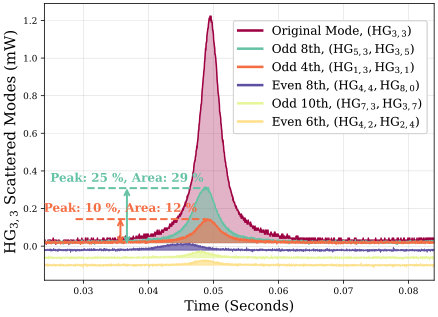

In [33]:
start = 600
finish = 2100
xdata = df1["Source"].values[start:finish]
freq = df1["CH1"].values[start:finish]
pd1 = df1["CH2"].values[start:finish]
pd2_1_33 = df1["CH3"].values[start:finish]
pd2_2_33 = df2["CH3"].values[start:finish]
pd2_3_33 = df3["CH3"].values[start:finish]
pd2_4_33 = df4["CH3"].values[start:finish]
pd2_5_33 = df5["CH3"].values[start:finish]
pd2_6_33 = df6["CH3"].values[start:finish]
pd2_7_33 = df7["CH3"].values[start:finish]

colors = plt.cm.get_cmap("Spectral", 6)
factor = 1/1.091*2.9 # V to mW
fig, ax = plt.subplots(figsize=(7, 5))

# ax.plot(xdata, freq/1.5+0.35, "r", label="Laser Frequency")
# ax.plot(xdata, pd1, "b", label="PD1")
ax.plot(xdata, pd2_1_33*factor, color=colors(0), label=r"Original Mode, ($\mathrm{HG_{3,3}}$)")
ax.plot(xdata, pd2_5_33*factor, color=colors(4), label=r"Odd 8th, ($\mathrm{HG_{5,3}}, \mathrm{HG_{3,5}}$)")
ax.plot(xdata, pd2_7_33*factor, color=colors(1), label=r"Odd 4th, ($\mathrm{HG_{1,3}}, \mathrm{HG_{3,1}}$)")

ax.plot(xdata, (pd2_2_33-0.015)*factor, lw=0.8, color=colors(5), label=r"Even 8th, ($\mathrm{HG_{4,4}}, \mathrm{HG_{8,0}}$)")
ax.plot(xdata, (pd2_3_33-0.03)*factor, lw=0.8, color=colors(3), label=r"Odd 10th, ($\mathrm{HG_{7,3}}, \mathrm{HG_{3,7}}$)")
ax.plot(xdata, (pd2_6_33-0.045)*factor, lw=0.8, color=colors(2), label=r"Even 6th, ($\mathrm{HG_{4,2}}, \mathrm{HG_{2,4}}$)")

ax.fill_between(xdata, pd2_1_33*factor, 6.9e-3*factor, color=colors(0), alpha=0.3)
ax.fill_between(xdata, pd2_5_33*factor, 6.9e-3*factor, color=colors(4), alpha=0.5)
ax.fill_between(xdata, pd2_7_33*factor, 6.9e-3*factor, color=colors(1), alpha=0.5)
ax.fill_between(xdata, (pd2_2_33-0.015)*factor, (6.9e-3-0.015)*factor, color=colors(5), alpha=0.7)
ax.fill_between(xdata, (pd2_3_33-0.03)*factor, (6.9e-3-0.03)*factor, color=colors(3), alpha=0.7)
ax.fill_between(xdata, (pd2_6_33-0.045)*factor, (6.9e-3-0.045)*factor, color=colors(2), alpha=0.7)

plt.axhline(y=0.116*factor, xmin=0.11, xmax=0.423, color=colors(4), linestyle='--', linewidth=2.)
plt.axhline(y=0.054*factor, xmin=0.08, xmax=0.415, color=colors(1), linestyle='--', linewidth=2.)

ax.annotate('Peak: 25 %, Area: 29 %', xy=(0.0367, 0.0), xytext=(0.0367, 0.36),
             arrowprops={'arrowstyle': '<->', 'color': colors(4), 'linewidth': 2},
             fontsize=12, color=colors(4), fontweight="bold", ha='center', va='center')

ax.annotate('Peak: 10 %, Area: 12 %', xy=(0.0357, 0.0), xytext=(0.0357, 0.2),
             arrowprops={'arrowstyle': '<->', 'color': colors(1), 'linewidth': 2},
             fontsize=12, color=colors(1), fontweight="bold", ha='center', va='center')

ax.set_xlabel("Time (Seconds)", fontsize=14)
ax.set_ylabel(r"$\mathrm{HG}_{3,3}$ Scattered Modes (mW)", fontsize=15)

handles, labels = ax.get_legend_handles_labels()
for handle in handles:
    handle.set_alpha(1.0)

legend = plt.legend(handles, labels, loc=(0.485, 0.53), ncol=1, fontsize=12);
ax.add_artist(legend);

legend_lines = legend.get_lines()
for idx, line in enumerate(legend_lines):
    line.set_linewidth(2.5)


# fig.savefig('./Experiment Paper/HG33ScatteredModeSpec.pdf', \
#             bbox_inches='tight', dpi=300, pad_inches=0.01);

# fig.savefig('/Users/liutao/Desktop/Thesis/Experiment/HG33ScatteredModeSpec.pdf', bbox_inches='tight', dpi=300, pad_inches=0.01);


In [6]:

CB_color_cycle = ['#377eb8', '#ff7f00', '#4daf4a',
                  '#f781bf', '#a65628', '#984ea3',
                  '#999999', '#e41a1c', '#dede00']


In [16]:
def HG33Area(ydata, pdoffset=6.9e-3):
    fig, ax = plt.subplots(figsize=(7, 5))

    ax.plot(xdata, ydata, CB_color_cycle[0])

    # offset = np.sort(ydata)[:base_threshold].mean()
    offset = pdoffset
    ax.hlines(y=offset, xmin=xdata.min(), xmax=xdata.max(), color=CB_color_cycle[1], lw=2)

    ydata = ydata - offset
    integration = integrate.cumtrapz(ydata, xdata, initial=0)
    ax1 = ax.twinx()
    ax1.plot(xdata, integration, lw=2, color=CB_color_cycle[2])

    length = ydata.shape[0]
    plateau_idx = [0.082869, 0.263038, 0.4432065, 0.622089, 0.8017575, 0.981426]
    
    Areas = []
    for idx, x in enumerate(plateau_idx):
        x1 = x
        ax1.plot(xdata[int(x1*length)], integration[int(x1*length)], '.', color=CB_color_cycle[7], markersize=20)
        if idx < len(plateau_idx) - 1:
            x2 = plateau_idx[idx+1]
            Area = integration[int(x2*length)] - integration[int(x1*length)]
            print(f"The area under the peak is: {Area:.6f}")
            Areas.append(Area)


    ax.set_xlabel("Time [Seconds]", fontsize=14)
    ax.set_ylabel("PD Signal [mW]", fontsize=16, color=CB_color_cycle[0])
    ax1.set_ylabel("Area Under the Signal", fontsize=16, color=CB_color_cycle[2])
    ax.tick_params(axis='y', labelcolor=CB_color_cycle[0])
    ax1.tick_params(axis='y', labelcolor=CB_color_cycle[2])
    ax1.spines['left'].set_color(CB_color_cycle[0]) 
    ax1.spines['right'].set_color(CB_color_cycle[2])
    # fig.savefig('/Users/liutao/Desktop/Thesis/Experiment/HG33Power_area.pdf', bbox_inches='tight', dpi=300, pad_inches=0.01);
    
    return np.array(Areas)

In [55]:
# factor = 1/1.091*2.9 # V to mW

# area_1_33s = HG33Area(pd2_1_33*factor, 10e-3*factor,) 
# area_1_33 = mean_std(area_1_33s)

In [12]:
peaks, _ = find_peaks(pd2_1_33, height=0.45)
[f"{peak:.6f}" for peak in peaks/pd2_1_33.shape[0]]

['0.000429',
 '0.176740',
 '0.177311',
 '0.177597',
 '0.349336',
 '0.350336',
 '0.350622',
 '0.537077',
 '0.537505',
 '0.707101',
 '0.707387',
 '0.707673',
 '0.708101',
 '0.895557',
 '0.896414',
 '0.897414']

In [50]:
(0.176740+0.349336)/2, (0.537077+0.349336)/2, (0.537077+0.707101)/2, (0.896414+0.707101)/2

(0.263038, 0.4432065, 0.622089, 0.8017575)

In [13]:
2*0.8017575-0.622089

0.981426

In [28]:
# area_1_33s = HG33Area(pd2_1_33, 11e-3,) 
# area_1_33 = mean_std(area_1_33s)

In [27]:
# area_2_33s = HG33Area(pd2_2_33, 7.e-3) 
# area_2_33 = mean_std(area_2_33s)

In [26]:
# area_3_33s = HG33Area(pd2_3_33, 6.9e-3,) 
# area_3_33 = mean_std(area_3_33s)

In [176]:
area_3_33/area_1_33, (pd2_3_33.max()-6.9e-3)/(pd2_1_33.max()-10e-3)

(0.02951042930790478+/-0.0006803693161989047, 0.032378854625550665)

In [25]:
# area_4_33s = HG33Area(pd2_4_33, 6.95e-3) 
# area_4_33 = mean_std(area_4_33s)

In [24]:
# area_5_33s = HG33Area(pd2_5_33, 7.8e-3)
# area_5_33 = mean_std(area_5_33s)

In [23]:
# area_6_33s = HG33Area(pd2_6_33, 7.0e-3) 
# area_6_33 = mean_std(area_6_33s)

In [22]:
# area_7_33s = HG33Area(pd2_7_33, 7.2e-3)
# area_7_33 = mean_std(area_7_33s)

In [181]:
area_5_33/area_1_33, (pd2_5_33.max()-7.8e-3)/(pd2_1_33.max()-10e-3)

(0.2931683778865225+/-0.007952867322016294, 0.24361233480176211)

In [182]:
area_7_33/area_1_33, (pd2_7_33.max()-7.2e-3)/(pd2_1_33.max()-10e-3)

(0.11799807285497008+/-0.0026047624714725165, 0.10660792951541849)

In [183]:
HOMs = [area_2_33, area_3_33, area_5_33, area_6_33, area_7_33]
[mode/sum(HOMs)*100 for mode in HOMs]

[8.309896786168931+/-0.23006134868407938,
 5.842313794587124+/-0.14765014288835382,
 58.03987601781072+/-0.6943493872711666,
 4.447298698663461+/-0.13677653739065024,
 23.360614702769762+/-0.5009350786649599]

In [184]:
HG33MM = (area_2_33 + area_3_33 + area_4_33 + area_5_33 + area_6_33+area_7_33) / \
(area_2_33 + area_3_33 + area_4_33 + area_1_33 + area_5_33 + area_6_33+area_7_33)
HG33MM / HG00MM

11.48381068201734+/-0.27454175882198856

In [185]:
path1 = './0913/3/HG55.csv'
path2 = './0913/3/HG55_2nd_1.csv'
path3 = './0913/3/HG55_2nd_2.csv'
path4 = './0913/3/HG55_2nd_3.csv'
path5 = './0913/3/HG55_2nd_4.csv'
path6 = './0913/3/HG55_2nd_5.csv'
path7 = './0913/3/HG55_2nd_6.csv'
path8 = './0913/3/HG55_2nd_7.csv'
path9 = './0913/3/HG55_2nd_8.csv'

df1 = pd.read_csv(path1, skiprows=10)
df2 = pd.read_csv(path2, skiprows=10)
df3 = pd.read_csv(path3, skiprows=10)
df4 = pd.read_csv(path4, skiprows=10)
df5 = pd.read_csv(path5, skiprows=10)
df6 = pd.read_csv(path6, skiprows=10)
df7 = pd.read_csv(path7, skiprows=10)
df8 = pd.read_csv(path8, skiprows=10)
df9 = pd.read_csv(path9, skiprows=10)
units = drop_return(df1, index=0)
units = drop_return(df2, index=0)
units = drop_return(df3, index=0)
units = drop_return(df4, index=0)
units = drop_return(df5, index=0)
units = drop_return(df6, index=0)
units = drop_return(df7, index=0)
units = drop_return(df8, index=0)
units = drop_return(df9, index=0)
print(units.values)

df1 = df1.apply(lambda col:pd.to_numeric(col, errors='coerce'))
df2 = df2.apply(lambda col:pd.to_numeric(col, errors='coerce'))
df3 = df3.apply(lambda col:pd.to_numeric(col, errors='coerce'))
df4 = df4.apply(lambda col:pd.to_numeric(col, errors='coerce'))
df5 = df5.apply(lambda col:pd.to_numeric(col, errors='coerce'))
df6 = df6.apply(lambda col:pd.to_numeric(col, errors='coerce'))
df7 = df7.apply(lambda col:pd.to_numeric(col, errors='coerce'))
df8 = df8.apply(lambda col:pd.to_numeric(col, errors='coerce'))
df9 = df9.apply(lambda col:pd.to_numeric(col, errors='coerce'))

xdata = df1["Source"].values
freq = df1["CH1"].values
pd1 = df1["CH2"].values
pd2_1_55 = df1["CH3"].values
pd2_2_55 = df2["CH3"].values
pd2_3_55 = df3["CH3"].values
pd2_4_55 = df4["CH3"].values
pd2_5_55 = df5["CH3"].values
pd2_6_55 = df6["CH3"].values
pd2_7_55 = df7["CH3"].values
pd2_8_55 = df8["CH3"].values
pd2_9_55 = df9["CH3"].values

['Second' 'Volt' 'Volt' 'Volt']


In [56]:
# colors = plt.cm.get_cmap("Spectral", 5)

# fig, ax = plt.subplots(figsize=(7, 5))

# ax.plot(xdata, freq, "r", label="Laser Frequency")
# ax.plot(xdata, pd1, "b", label="PD1")
# ax.plot(xdata, pd2_1_55, color=colors(0), label="PD2 HG55")
# ax.plot(xdata, pd2_2_55, color=colors(1), label="PD2 HG55 2nd 1")
# ax.plot(xdata, pd2_3_55, color=colors(2), label="PD2 HG55 2nd 2")
# ax.plot(xdata, pd2_4_55, color=colors(3), label="PD2 HG55 2nd 3")
# ax.plot(xdata, pd2_5_55, color=colors(4), label="PD2 HG55 2nd 4")
# ax.plot(xdata, pd2_6_55, color=colors(5), label="PD2 HG55 2nd 5")
# # ax.plot(xdata, pd2_7_55, color=colors(6), label="PD2 HG55 2nd 6")
# ax.set_xlabel("Time (Seconds)", fontsize=14)
# ax.set_ylabel("Signal (V)", fontsize=16)
# plt.legend(loc=(0.05, 0.05), ncol=2, fontsize=14);

In [187]:
def HG55Area(ydata, pdoffset=6.9e-3):
    fig, ax = plt.subplots(figsize=(7, 5))

    ax.plot(xdata, ydata, 'b')

    # offset = np.sort(ydata)[:base_threshold].mean()
    offset = pdoffset
    ax.hlines(y=offset, xmin=xdata.min(), xmax=xdata.max(), color='r', lw=2)

    ydata = ydata - offset
    integration = integrate.cumtrapz(ydata, xdata, initial=0)
    ax1 = ax.twinx()
    ax1.plot(xdata, integration, lw=2, color="orange")

    length = ydata.shape[0]
    plateau_idx = [0.0860, 0.2645375, 0.443063, 0.6191595, 0.7999]
    
    Areas = []
    for idx, x in enumerate(plateau_idx):
        x1 = x
        ax1.plot(xdata[int(x1*length)], integration[int(x1*length)], 'y.', markersize=20)
        if idx < len(plateau_idx) - 1:
            x2 = plateau_idx[idx+1]
            Area = integration[int(x2*length)] - integration[int(x1*length)]
            print(f"The area under the peak is: {Area:.6f}")
            Areas.append(Area)


    ax.set_xlabel("Time Step", fontsize=14)
    ax.set_ylabel("PD Signal (mV)", fontsize=16)
    ax1.set_ylabel("Area Under the Signal", fontsize=16)
    ax.tick_params(axis='y', labelcolor="blue")
    ax1.tick_params(axis='y', labelcolor="orange")
    ax1.spines['left'].set_color('blue') 
    ax1.spines['right'].set_color('orange')
    
    return np.array(Areas)

In [188]:
peaks, _ = find_peaks(pd2_1_55, height=0.155)
[f"{peak:.6f}" for peak in peaks/pd2_1_33.shape[0]]

['0.177025',
 '0.177311',
 '0.177740',
 '0.178311',
 '0.352050',
 '0.352336',
 '0.352622',
 '0.353336',
 '0.353622',
 '0.353908',
 '0.354622',
 '0.533505',
 '0.534076',
 '0.534791',
 '0.535505',
 '0.535791',
 '0.704243',
 '0.704529',
 '0.705244',
 '0.894985',
 '0.895271',
 '0.895557']

In [189]:
(0.177025+0.352050)/2, (0.534076+0.352050)/2, (0.534076+0.704243)/2, (0.895557+0.704243)/2

(0.2645375, 0.443063, 0.6191595, 0.7999)

In [190]:
2*0.2645375-0.443063

0.08601199999999998

In [21]:
# area_1_55s = HG55Area(pd2_1_55, 7.e-3)
# area_1_55 = mean_std(area_1_55s)

In [20]:
# area_2_55s = HG55Area(pd2_2_55, 7.3e-3)
# area_2_55 = mean_std(area_2_55s)

In [19]:
# area_3_55s = HG55Area(pd2_3_55, 7.2e-3)
# area_3_55 = mean_std(area_3_55s)

In [18]:
# area_4_55s = HG55Area(pd2_4_55, 7.1e-3)
# area_4_55 = mean_std(area_4_55s)

In [17]:
# area_5_55s = HG55Area(pd2_5_55, 7.e-3)
# area_5_55 = mean_std(area_5_55s)

In [16]:
# area_6_55s = HG55Area(pd2_6_55, 7.8e-3)
# area_6_55 = mean_std(area_6_55s)

In [15]:
# area_7_55s = HG55Area(pd2_7_55, 7.e-3)
# area_7_55 = mean_std(area_7_55s)

In [14]:
# area_8_55s = HG55Area(pd2_8_55, 7.5e-3)
# area_8_55 = mean_std(area_8_55s)

In [13]:
# area_9_55s = HG55Area(pd2_9_55, 6.95e-3)
# area_9_55 = mean_std(area_9_55s)

In [200]:
HG55MM = (area_2_55 + area_3_55 + area_4_55 + area_5_55 + area_6_55 +area_7_55+area_8_55+area_9_55) / \
(area_2_55 + area_3_55 + area_4_55 + area_5_55+ area_1_55 + area_6_55 +area_7_55+area_8_55+area_9_55)
HG55MM / HG00MM

21.27540509658089+/-0.46492262541708684

In [201]:
path1 = './0913/3/HG66.csv'
path2 = './0913/3/HG66_2nd_1.csv'
path3 = './0913/3/HG66_2nd_2.csv'
path4 = './0913/3/HG66_2nd_3.csv'
path5 = './0913/3/HG66_2nd_4.csv'
path6 = './0913/3/HG66_2nd_5.csv'
path7 = './0913/3/HG66_2nd_6.csv'
path8 = './0913/3/HG66_2nd_7.csv'
path9 = './0913/3/HG66_2nd_8.csv'
path10 = './0913/3/HG66_2nd_9.csv'
path11 = './0913/3/HG66_2nd_10.csv'
path12 = './0913/3/HG66_2nd_11.csv'


df1 = pd.read_csv(path1, skiprows=10)
df2 = pd.read_csv(path2, skiprows=10)
df3 = pd.read_csv(path3, skiprows=10)
df4 = pd.read_csv(path4, skiprows=10)
df5 = pd.read_csv(path5, skiprows=10)
df6 = pd.read_csv(path6, skiprows=10)
df7 = pd.read_csv(path7, skiprows=10)
df8 = pd.read_csv(path8, skiprows=10)
df9 = pd.read_csv(path9, skiprows=10)
df10 = pd.read_csv(path10, skiprows=10)
df11 = pd.read_csv(path11, skiprows=10)
units = drop_return(df1, index=0)
units = drop_return(df2, index=0)
units = drop_return(df3, index=0)
units = drop_return(df4, index=0)
units = drop_return(df5, index=0)
units = drop_return(df6, index=0)
units = drop_return(df7, index=0)
units = drop_return(df8, index=0)
units = drop_return(df9, index=0)
units = drop_return(df10, index=0)
units = drop_return(df11, index=0)
print(units.values)

df1 = df1.apply(lambda col:pd.to_numeric(col, errors='coerce'))
df2 = df2.apply(lambda col:pd.to_numeric(col, errors='coerce'))
df3 = df3.apply(lambda col:pd.to_numeric(col, errors='coerce'))
df4 = df4.apply(lambda col:pd.to_numeric(col, errors='coerce'))
df5 = df5.apply(lambda col:pd.to_numeric(col, errors='coerce'))
df6 = df6.apply(lambda col:pd.to_numeric(col, errors='coerce'))
df7 = df7.apply(lambda col:pd.to_numeric(col, errors='coerce'))
df8 = df8.apply(lambda col:pd.to_numeric(col, errors='coerce'))
df9 = df9.apply(lambda col:pd.to_numeric(col, errors='coerce'))
df10 = df10.apply(lambda col:pd.to_numeric(col, errors='coerce'))
df11 = df11.apply(lambda col:pd.to_numeric(col, errors='coerce'))

xdata = df1["Source"].values
freq = df1["CH1"].values
pd1 = df1["CH2"].values
pd2_1_66 = df1["CH3"].values
pd2_2_66 = df2["CH3"].values
pd2_3_66 = df3["CH3"].values
pd2_4_66 = df4["CH3"].values
pd2_5_66 = df5["CH3"].values
pd2_6_66 = df6["CH3"].values
pd2_7_66 = df7["CH3"].values
pd2_8_66 = df8["CH3"].values
pd2_9_66 = df9["CH3"].values
pd2_10_66 = df10["CH3"].values
pd2_11_66 = df11["CH3"].values

['Second' 'Volt' 'Volt' 'Volt']


In [57]:
# colors = plt.cm.get_cmap("Spectral", 11)

# fig, ax = plt.subplots(figsize=(7, 5))

# ax.plot(xdata, freq/6+0.08, "r", label="Laser Frequency")
# # ax.plot(xdata, pd1, "b", label="PD1")
# ax.plot(xdata, pd2_1_66, color=colors(1), label="HG66")
# ax.plot(xdata, pd2_5_66, color=colors(8), label="HG66 2nd 1")
# ax.plot(xdata, pd2_7_66, color=colors(3), label="HG66 2nd 2")

# ax.plot(xdata, pd2_6_66-0.01, color=colors(9), label="HG66 2nd 3")
# ax.plot(xdata, pd2_10_66-0.02, color=colors(4), label="HG66 2nd 4")
# ax.plot(xdata, pd2_3_66-0.03, color=colors(10), label="HG66 2nd 5")
# ax.plot(xdata, pd2_9_66-0.04, color=colors(7), label="HG66 2nd 6")
# ax.plot(xdata, pd2_8_66-0.05, color=colors(5), label="HG66 2nd 7")

# ax.plot(xdata, pd2_4_66-0.065, color=colors(0), label="HG66 2nd 8")
# ax.plot(xdata, pd2_11_66-0.08, color=colors(6), label="HG66 2nd 9")
# ax.plot(xdata, pd2_2_66-0.095, color=colors(2), label="HG66 2nd 10")
# ax.set_xlabel("Time (Seconds)", fontsize=14)
# ax.set_ylabel("Signal (V)", fontsize=16)
# plt.legend(loc=(1.02, 0.14), ncol=1, fontsize=12);

# # fig.savefig('./0913/HG66_modes.png', \
# #             bbox_inches='tight', dpi=500, pad_inches=0.01);

In [203]:
def HG66Area(ydata, pdoffset=6.9e-3):
    fig, ax = plt.subplots(figsize=(7, 5))

    ax.plot(xdata, ydata, 'b')

    # offset = np.sort(ydata)[:base_threshold].mean()
    offset = pdoffset
    ax.hlines(y=offset, xmin=xdata.min(), xmax=xdata.max(), color='r', lw=2)

    ydata = ydata - offset
    integration = integrate.cumtrapz(ydata, xdata, initial=0)
    ax1 = ax.twinx()
    ax1.plot(xdata, integration, lw=2, color="orange")

    length = ydata.shape[0]
    plateau_idx = [0.0885125, 0.2648235, 0.4411345, 0.6195885, 0.799114]
    
    Areas = []
    for idx, x in enumerate(plateau_idx):
        x1 = x
        ax1.plot(xdata[int(x1*length)], integration[int(x1*length)], 'y.', markersize=20)
        if idx < len(plateau_idx) - 1:
            x2 = plateau_idx[idx+1]
            Area = integration[int(x2*length)] - integration[int(x1*length)]
            print(f"The area under the peak is: {Area:.6f}")
            Areas.append(Area)


    ax.set_xlabel("Time Step", fontsize=14)
    ax.set_ylabel("PD Signal (mV)", fontsize=16)
    ax1.set_ylabel("Area Under the Signal", fontsize=16)
    ax.tick_params(axis='y', labelcolor="blue")
    ax1.tick_params(axis='y', labelcolor="orange")
    ax1.spines['left'].set_color('blue') 
    ax1.spines['right'].set_color('orange')
    
    return np.array(Areas)

In [204]:
peaks, _ = find_peaks(pd2_1_66, height=0.099)
[f"{peak:.6f}" for peak in peaks/pd2_1_33.shape[0]]

['0.009144',
 '0.009430',
 '0.009716',
 '0.010144',
 '0.010430',
 '0.010716',
 '0.011716',
 '0.155451',
 '0.155737',
 '0.156308',
 '0.156737',
 '0.157022',
 '0.374196',
 '0.374911',
 '0.375196',
 '0.375482',
 '0.508073',
 '0.730390',
 '0.730676',
 '0.731104',
 '0.866552',
 '0.866838',
 '0.867124',
 '0.867553',
 '0.867838',
 '0.868124']

In [205]:
(0.155451+0.374196)/2, (0.508073+0.374196)/2, (0.508073+0.731104)/2, (0.867124+0.731104)/2, 

(0.2648235, 0.4411345, 0.6195885, 0.799114)

In [206]:
2*0.2648235-0.4411345

0.0885125

In [11]:
# area_1_66s = HG66Area(pd2_1_66, 8e-3)
# area_1_66 = mean_std(area_1_66s)

In [10]:
# area_2_66s = HG66Area(pd2_2_66, 7.4e-3)
# area_2_66 = mean_std(area_2_66s)

In [9]:
# area_3_66s = HG66Area(pd2_3_66, 7.1e-3)
# area_3_66 = mean_std(area_3_66s)

In [8]:
# area_4_66s = HG66Area(pd2_4_66, 7.1e-3)
# area_4_66 = mean_std(area_4_66s)

In [7]:
# area_5_66s = HG66Area(pd2_5_66, 7.6e-3)
# area_5_66 = mean_std(area_5_66s)

In [6]:
# area_6_66s = HG66Area(pd2_6_66, 7.1e-3)
# area_6_66 = mean_std(area_6_66s)

In [5]:
# area_7_66s = HG66Area(pd2_7_66, 7.3e-3)
# area_7_66 = mean_std(area_7_66s)

In [4]:
# area_8_66s = HG66Area(pd2_8_66, 7.e-3)
# area_8_66 = mean_std(area_8_66s)

In [3]:
# area_9_66s = HG66Area(pd2_9_66, 7.1e-3)
# area_9_66 = mean_std(area_9_66s)

In [2]:
# area_10_66s = HG66Area(pd2_10_66, 6.95e-3)
# area_10_66 = mean_std(area_10_66s)

In [1]:
# area_11_66s = HG66Area(pd2_11_66, 7.3e-3)
# area_11_66 = mean_std(area_11_66s)

In [218]:
HG66MM = (area_2_66 + area_3_66 + area_4_66 + area_5_66 + area_6_66 + area_7_66 +area_8_66+area_9_66+area_10_66+area_11_66) \
/(area_2_66+area_3_66+area_4_66+area_5_66 + area_1_66 + area_6_66 + area_7_66+ area_8_66 + area_9_66+area_10_66+area_11_66)
HG66MM / HG00MM

24.773460249008544+/-0.5392533479175443

In [240]:
HG66MM / HG00MM

24.370965793912003+/-0.5363694248759736

In [233]:
HG00MM

0.03001122271886973+/-0.0006285935590159794

In [232]:
# colors = ["#000000", "#ff0000",	"#ffcc00"]

# Area_MMs = []
# for idx, MM in enumerate([1, HG11MM/HG00MM, HG22MM/HG00MM, HG33MM/HG00MM, HG44MM/HG00MM, HG55MM/HG00MM, HG66MM/HG00MM]):
#     Area_MMs.append(MM)
#     print(MM)
    
# # print(Area_MMs)
# # scopesin = np.array([74.9, 86.1, 58.6, 40.3, 17.8, 43.4, 34.8])

# # scopesout = np.array([382, 332, 173, 81.2, 28.5, 44.2, 28.6])
# # scatteredHOM = np.array([7.68, 22.5, 26.2, 16.6, 9.4, 18.4, 13.6])

# # MMs = scatteredHOM / scopesout
# # # print(MMs)
# # MMs = MMs/MMs[0]

# nn = np.linspace(-0.1, 6.1, 100)
# yy = nn**2 + nn + 1

# # MMSIM_12 = [1, 2.9656455113330282,
# # 6.779376738722368,
# # 12.21626212284184,
# # 18.963299211556844,
# # 26.645805570088818,
# # 34.85816814792329,]

# # MMSIM_205 = [ 1.        ,  2.93890597,  6.61494169, 11.65446738, 17.56687649, 23.81398526, 29.88249646]
# # Make the plot
# fig, ax = plt.subplots(figsize=(7, 5))

# # ax.plot(range(7), MMs, ".", markersize=15, label="Peak")
# ax.plot(range(7), Area_MMs, ".", color=colors[2], markersize=15, alpha=1, label="Measurement")
# # ax.plot(range(7), MMs, ".", markersize=15, label="2% MM")
# # ax.plot(range(7), MMSIM_12, ".", color=colors[0], markersize=15, alpha=0.8, label="Calculation (1.1% MM)")
# ax.plot(nn, yy, "--", color=colors[1], linewidth=3, label=r"Mode Mismatch: $\mathrm{n^2+n+1}$")
# ax.set_ylabel("Power Loss Factor", fontsize=16)
# ax.set_xlabel("$\mathrm{HG_{\mathrm{n}, \mathrm{n}}}$", fontsize=19)
# ax.set_xticks([0, 1, 2, 3, 4, 5, 6])
# plt.legend(fontsize=15, ncols=1, loc="upper left")

# ax.set_xlim([-0.2, 6.2]);
# # fig.savefig('/Users/liutao/Desktop/Experiments/0907/MM_Power_Loss.png', bbox_inches='tight', dpi=500, pad_inches=0.01);

In [ ]:
HG00MM